# DS Series : Scoring dan Analyst Perbaikan Mesin 
---
project kali ini saya membuat sebuah portofolio data science untuk prediksi dan estimasi penjadwalan perbaikan mesin industri dengan. 
data yang didapatkan secara dummy

<ul>
    <li><b>Portofolio Data Science Series</b></li> 
    <li>Episode 1 : Prediksi dan Estimasi</li>
</ul>

>  Alan Firdaus 

# 1. Data Wrangling
---
pada bagian pertama ini mulai dari data preparation yaitu menyiapan datasheet yang akan digunakan dalam portofolio ini. Pada tahap ini juga kita akan mulai dari load datasheet yang digunakan hingga pengecekan apakah ada fitur pada dataheet yang memiliki nilai missing value 

## 1.1 Load Datasheet & Import Library
---

In [25]:
# Import library yang akan digunakan 
import numpy as np              # library untuk komputasi numerik dengan python 
import pandas as pd             # library untuk pengolahan dataframe 
import matplotlib.pyplot as plt # library untuk visualisasi data 
import seaborn as sns           # library untuk visualisasi data 

import warnings                 # library untuk handling error 
import seaborn as sns           # library untuk visualisasi data 

# buat variabel untuk mengelola error pada saat proses komputasi 
warnings.filterwarnings('ignore')

# load- datasheet yang akan diguanakan 
df_mtn_machine = pd.read_csv('./datasheet/maintenance_mesin.csv')

# tampilkan isi dari datasheet yang sudah di import
print(df_mtn_machine)

      Jam_Operasi  Suhu_Motor  Getaran  Tekanan_Oli  Arus_Listrik  \
0            1360       75.15     1.34         2.23          7.47   
1            4272       81.94     4.84         1.83          3.53   
2            3592       70.97     2.67         1.93          7.63   
3             966       55.00     4.92         2.47          4.95   
4            4926       76.31     3.89         2.47          6.31   
...           ...         ...      ...          ...           ...   
1195         4821       81.12     3.68         2.10          5.05   
1196         1324       72.88     3.62         2.15          7.19   
1197         2765       61.66     4.42         2.60          7.19   
1198         1436       67.14     3.06         1.43          6.22   
1199         3300       73.27     4.69         2.59          6.18   

      Umur_Sisa_Mesin  
0                3000  
1                1546  
2                2065  
3                3000  
4                1163  
...               ...  
119

<b>Insight : </b>
<p>dari datasheet tersebut dapat kita ketahui bahwa sebagian besar memiliki tipe data numerik dan memiliki 6 kolom dan 1200 baris</p>

## 1.2 Cek Duplikasi dan missing value pada datasheet 
---
setelah kita mengetahui jumlah kolom dan baris serta tipe data pada dataframe yang sudah di load maka selanjutnya kita akn mencoba mencari tahu apakah data kita memiliki missing value ataupun nilai yang duplikat 

In [26]:
# buat kode program untuk mengecek duplikasi dan missing value 
print(f"Duplikasi pada dataframe tersebut berjumlah {df_mtn_machine.duplicated().sum().sum()} data")
print(f"Jumlah missing value pada dataframe tersbeut berjumlah {df_mtn_machine.isnull().sum().sum()} data")

Duplikasi pada dataframe tersebut berjumlah 0 data
Jumlah missing value pada dataframe tersbeut berjumlah 0 data


<b>Insight :</b>
<p>Nah pada poin 1.2 kita dapat mengetahui bahwa datasheet yang kita gunakan tidak memiliki missing value sehingga kita bisa lanjut pada tahap analisis eksplorasi data</p>

# 2. Exploratory Data Analyst (EDA)
---
Di bagian poin nomor 2 ini kita akan melakukan analisis eksplorasi data lebih lanjut untuk mengetahui insight apa saja yang bisa didapatkan dari hasil analisis tersebut serta mencari insight yang bisa bermanfaat untuk kedepan nya. 

Dibagian ini akan dibagi dalam 2 section yaitu : 
<ul>
    <li>1.Data Manipulation : digunakan untuk memanipulasi data dengan metode statistik</li>
    <li>2.Eksplorasi data : digunakan untuk mencari insight dari data yang bermanfaat untuk kedepan nya</li>
</ul>

## 2.1 Data Manipluation Section 
---
padan bagian ini kita akan melakukan analisis untuk mengetahui apakah datasheet yang kita gunakan sudah bersih dari nilai outlier atau pun melihat pesebaran distribusi normal dari setiap fitur beserta korelasi nya

### 2.1.1 Pengecekan Outlier dengan menggunakan visualisasi Boxplot dan IQR
---
penting untuk mengetahui apakah pada data benar-benar aman dari nilai outlier karena bisa mempengaruhi model saat melaukan tuning yang menyebabkan model menjadi tidak akurat dan bias sehingga untuk menghindari kondisi ini penting untuk melakukan pengecekan outlier pada smeua fitur yang ada pada datasheet 

#### Buat class oop untuk bagian section data manipulation
---
<p>karena proses EDA ini lama maka kita akan membuat sebuah program oop agar code tersebut bisa dijalankan berulang kali tanpa harus menulis ulang code dari awal yang dimana ini akan menghemat waktu </p>

In [27]:
class data_manipulation:
    def __init__(self, data, features, cols=4, rows=2, figsize=(10, 4), palette='rocket'):
        # Inisialisasi parameter dan data
        self.data = data.copy()  # gunakan salinan untuk menjaga data asli tetap aman
        self.features = features
        self.cols = cols
        self.rows = rows
        self.figsize = figsize
        self.palette = palette

    def detect_outliers(self, series):
        """
        Menghitung dan mengembalikan nilai outlier pada sebuah kolom (series) 
        menggunakan metode IQR (Interquartile Range).
        """
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        return series[(series < lower) | (series > upper)]

    def count_outliers(self):
        """
        Menghitung jumlah outlier untuk setiap fitur dan total keseluruhan dalam bentuk dictionary.
        """
        outlier_counts = {}
        total_outliers = 0

        for feature in self.features:
            if feature in self.data.columns:
                outliers = self.detect_outliers(self.data[feature])
                count = outliers.count()
                outlier_counts[feature] = count
                total_outliers += count
            else:
                outlier_counts[feature] = 'Fitur tidak ditemukan'

        outlier_counts['Total_Outliers'] = total_outliers
        return outlier_counts

    def count_outliers_df(self):
        """
        Menghitung jumlah outlier untuk setiap fitur dan mengembalikannya dalam bentuk DataFrame.
        """
        records = []

        for feature in self.features:
            if feature in self.data.columns:
                outliers = self.detect_outliers(self.data[feature])
                records.append({
                    'Fitur': feature,
                    'Jumlah Outlier': outliers.count()
                })
            else:
                records.append({
                    'Fitur': feature,
                    'Jumlah Outlier': 'Fitur tidak ditemukan'
                })

        return pd.DataFrame(records)

    def remove_outliers(self):
        """
        Menghapus baris pada data yang mengandung outlier untuk fitur-fitur yang ditentukan.
        Menggunakan metode IQR.
        """
        cleaned_data = self.data.copy()

        for feature in self.features:
            if feature in cleaned_data.columns:
                q1 = cleaned_data[feature].quantile(0.25)
                q3 = cleaned_data[feature].quantile(0.75)
                iqr = q3 - q1
                lower = q1 - 1.5 * iqr
                upper = q3 + 1.5 * iqr
                # filter data untuk hanya menyimpan nilai dalam rentang normal
                cleaned_data = cleaned_data[(cleaned_data[feature] >= lower) & (cleaned_data[feature] <= upper)]
        
        return cleaned_data

    def plot(self):
        """
        Menampilkan visualisasi boxplot untuk setiap fitur dengan anotasi outlier 
        dan background yang berubah jika terdapat outlier.
        """
        fig, axes = plt.subplots(self.rows, self.cols, figsize=self.figsize)
        axes = axes.flatten()

        for i, feature in enumerate(self.features):
            if feature not in self.data.columns:
                axes[i].text(0.5, 0.5, f"{feature}\ntidak ditemukan", 
                             horizontalalignment='center', verticalalignment='center', fontsize=12)
                axes[i].axis('off')
                continue

            ax = axes[i]
            sns.boxplot(x=self.data[feature], ax=ax, color=sns.color_palette(self.palette)[0])
            ax.set_title(f'Boxplot: {feature}')

            outliers = self.detect_outliers(self.data[feature])

            if not outliers.empty:
                for y in outliers:
                    ax.axvline(x=y, color='red', linestyle='--', alpha=0.5)
                ax.set_facecolor("#fce4e4")
            else:
                ax.set_facecolor("#f4f4f4")

        for j in range(len(self.features), len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()

<h5>Note :</h5><p>setelah program oop untuk bagian case data maniputaion berhasil untuk di buat maka selanjutnya kita akan memanggil instance yang sudah dibuat untuk keperluan analisis</p>

#### A.Visualisasi Boxplot 
---
pada bagian ini kita akan mengguanakan instance yang sudah kita buat

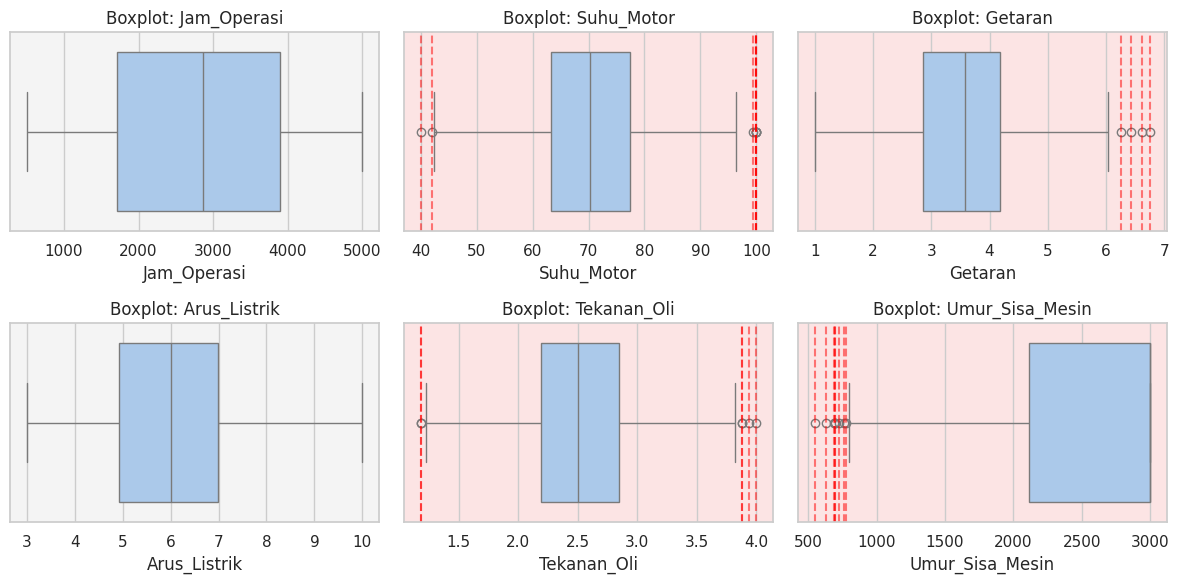

In [28]:
# Daftar fitur yang akan dicek untuk outlier
fitur_boxplot = ['Jam_Operasi', 'Suhu_Motor', 'Getaran', 'Arus_Listrik','Tekanan_Oli','Umur_Sisa_Mesin']

# Buat objek visualizer dengan parameter data dan konfigurasi subplot
visualizer = data_manipulation(df_mtn_machine, fitur_boxplot, cols=3, rows=2, figsize=(12, 6), palette="pastel")

# Tampilkan visualisasi boxplot beserta outlier-nya
visualizer.plot()

dari hasil visualisasi tersebut diketahui bahwa terdapat 4 kolom yang memiliki nilai outlier sehingga kita perlu memproses error tersebut dengan teknik IQR maupun winsorize tapi sebelum itu perlu untuk mengetahui berapa jumlah data yang memiliki nilai outlier.

<b>Note :</b>
fitur yang memiliki outlier ditandai dengan background berwarna merah muda dengan anotasi garis

#### B.Jumlah outliers pada masing masing fitur 
---
setelah kita mengetahui bahwa ternayata terdapat beberapa fitur yang terdeteksi memiliki nilai outliers 

In [29]:
# Hitung outlier dan tampilkan sebagai DataFrame
df_outliers = visualizer.count_outliers_df()
print(df_outliers)
print('\n ternyata terdapat beberapa fitur data yang memiliki nilai outliers terutama pada kolom umur sisa mesin yang berjumlah 8 data')

             Fitur  Jumlah Outlier
0      Jam_Operasi               0
1       Suhu_Motor               7
2          Getaran               4
3     Arus_Listrik               0
4      Tekanan_Oli               6
5  Umur_Sisa_Mesin               8

 ternyata terdapat beberapa fitur data yang memiliki nilai outliers terutama pada kolom umur sisa mesin yang berjumlah 8 data


#### C.Menghilangkan nilai outliers dengan perhitungan IQR
---
pada tahap ini kita akan mencoba untuk menghilangkan nilai outliers yang terdeteksi dengan menggunakan perhitungan IQR tapi jika ternayat masih ada beberapa data yang memiliki nilai outlier maka kita akan mencoba teknik lain dengan menggunakan winsorize dari library scipy atau z-score

<p><b>Berikut ini adalah tahapan yang akan dilakukan pada proses ini : </p>
    
<li> - Menghilangkan nilai outlier</li> 
<li> - Menampilkan visualisasi setelah handling outlier dengan teknik IQR</li>

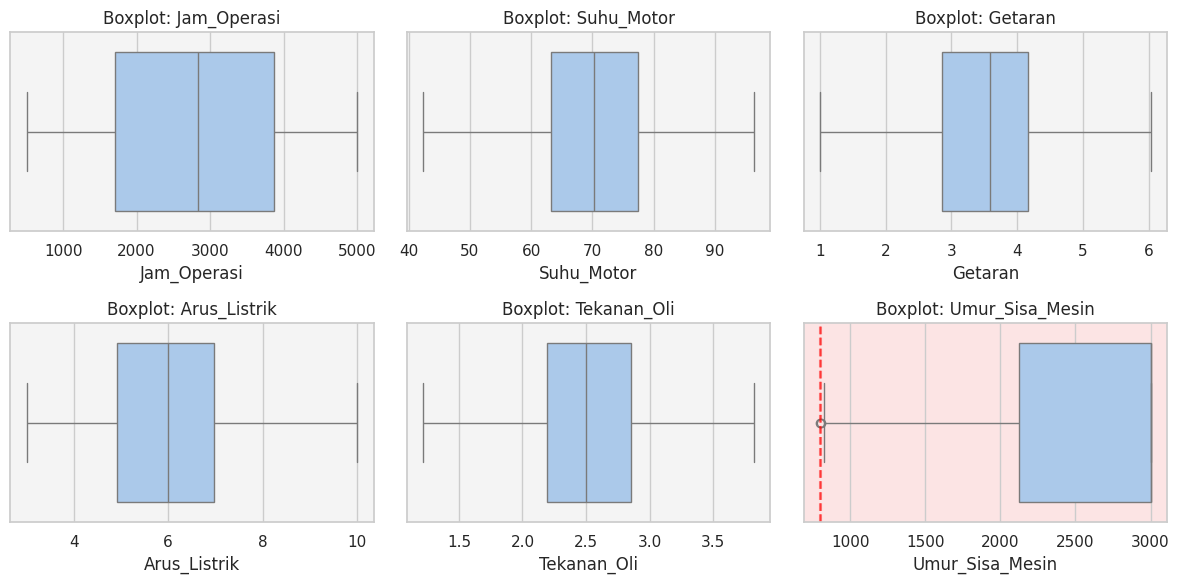

1.Data sebelum dibersihkan:, (1200, 6)
2.Data setelah outlier dihapus:, (1177, 6)
3.ternyata masih terdapat 1 data yang memiliki nilai outliers sehingga kita perlu menangani nya dengan teknik z-score


In [30]:
# Inisialisasi class seperti biasa
visualizer = data_manipulation(df_mtn_machine, fitur_boxplot, cols=2, rows=2, figsize=(12, 6), palette="pastel")

# Dapatkan data yang sudah dihapus outlier-nya
df_cleaned = visualizer.remove_outliers()

# Buat objek visualizer dengan parameter data dan konfigurasi subplot
visualizer = data_manipulation(df_cleaned, fitur_boxplot, cols=3, rows=2, figsize=(12, 6), palette="pastel")

# Tampilkan visualisasi boxplot beserta outlier-nya
visualizer.plot()

# Lihat hasil
print(f"1.Data sebelum dibersihkan:, {df_mtn_machine.shape}")
print(f"2.Data setelah outlier dihapus:, {df_cleaned.shape}")
print("3.ternyata masih terdapat 1 data yang memiliki nilai outliers sehingga kita perlu menangani nya dengan teknik z-score")

Tahap selanjutnya adalah melakukan analisis distribusi dan uji normalitas data untuk mengetahui apakah data yang sudah di proses memiliki distribusi ataupun normalitas yang baik sehingga kita bisa menggunakan nya untuk keperluan membuat model machine learning

### 2.1.2 Analisis Distribusi dan pengujian normalitas data 
---
pada poin 2.1.2 ini kita akan melakukan analisis untuk melihat distribusi dan normalitas data untuk semua fitur yang akan digunakan untuk keperluan model machine learning serta untuk menemukan insight yang bisa kita gunakan sebagai bahan analisis

#### A. Distribusi Normal dengan KDE dan PDF Serta Visualisasi data
---
pada tahap ini kita buat sebuah program oop untuk pengujian distribusi normal dan uji normalitas data

In [31]:
# import library yang dibutuhkan 
from scipy.stats import norm, shapiro
from statsmodels.distributions.empirical_distribution import ECDF

class DistribusiUjiNormalitas:
    def __init__(self, data, feature, figsize=(16, 4), palette='bright'):
        self.data = data
        self.feature = feature
        self.figsize = figsize
        self.palette = palette

        # Ambil array datanya
        self.values = self.data[self.feature].dropna().values

        # Uji normalitas (sekali saja di awal)
        self.stat, self.p = shapiro(self.values)
        self.is_normal = self.p > 0.05

    def _label_normalitas(self):
        if self.is_normal:
            return f"Normal (p = {self.p:.4f})"
        else:
            return f"Not Normal (p = {self.p:.4f})"

    def plot_distributions(self):
        fig, axes = plt.subplots(1, 4, figsize=self.figsize)
        sns.set_palette(self.palette)

        # Histogram
        sns.histplot(self.values, bins=20, kde=False, ax=axes[0], color='skyblue')
        axes[0].set_title(f'Histogram\n{self._label_normalitas()}')

        # KDE Plot
        sns.kdeplot(self.values, ax=axes[1], fill=True, color='lime')
        axes[1].set_title(f'KDE\n{self._label_normalitas()}')

        # PDF (Normal Distribution Curve)
        mu, std = np.mean(self.values), np.std(self.values)
        x = np.linspace(mu - 4*std, mu + 4*std, 100)
        y = norm.pdf(x, mu, std)
        axes[2].plot(x, y, color='orange')
        axes[2].fill_between(x, y, alpha=0.3, color='orange')
        axes[2].set_title(f'PDF Normal Fit\n{self._label_normalitas()}')

        # ECDF Plot
        ecdf = ECDF(self.values)
        axes[3].plot(ecdf.x, ecdf.y, marker='.', linestyle='none', color='magenta')
        axes[3].set_title(f'ECDF\n{self._label_normalitas()}')

        # Tambahan layout
        for ax in axes:
            ax.grid(True)
            ax.set_xlabel(self.feature)
            ax.set_ylabel('Density / Probability')

        plt.tight_layout()
        plt.show()

#### B. Uji normalitas dan juga distribusi untuk fitur suhu motor 
---
pada bagian ini kita akan melakukan uji normalitas dan juga distribusi data untuk kolom fitur suhu motor 

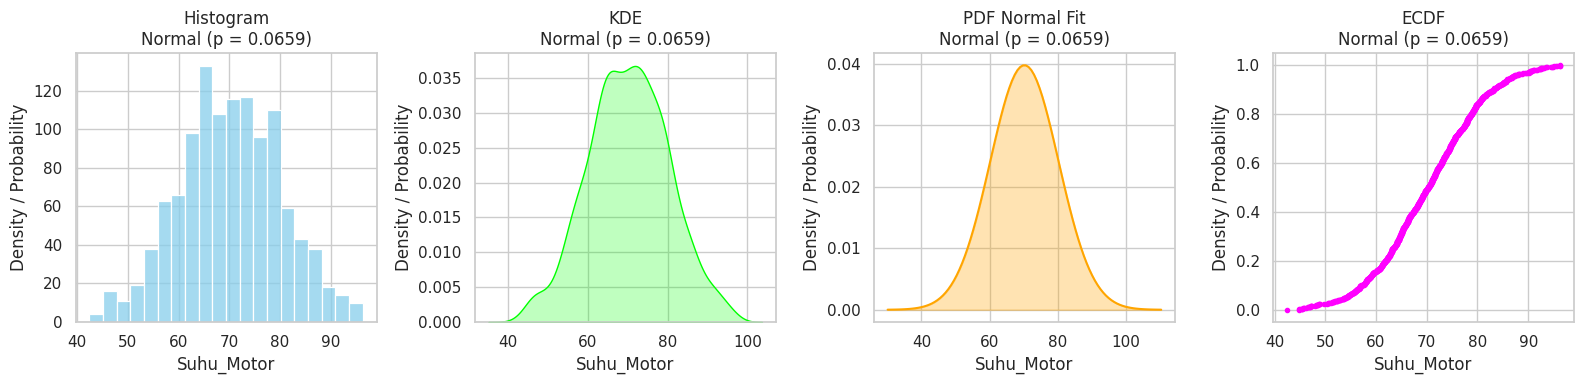

In [32]:
# Contoh Data (misalnya df_mtn_machine)
visual = DistribusiUjiNormalitas(df_cleaned, 'Suhu_Motor')
visual.plot_distributions()

<b>Insight : </b>
dari hasil insioght tersbeut dapat diketahui bahwa fitur suhu motor memiliki distribusi normal yang baik untuk Histogram, KDE, PDF Normal Fit lalu ECDF yang bisa kita simpulkan bahwa untuk fitur ini sudah cukup baik.

dan dari grafik histogram nya bisa kita asumsikan bahwa suhu motor rata-rata pada saat operasi produksi berlangsung ada di rentang 60 - 70 sehingga kita asumsikan bahwa ini adalah suhu normal pada motor dengan frekuensi kemunculan sekitar 121 kali 

#### C. Uji normalitas dan juga distribusi untuk fitur getaran 
---
pada bagian ini kita akan melakukan uji normalitas dan juga distribusi data untuk kolom fitur getaran

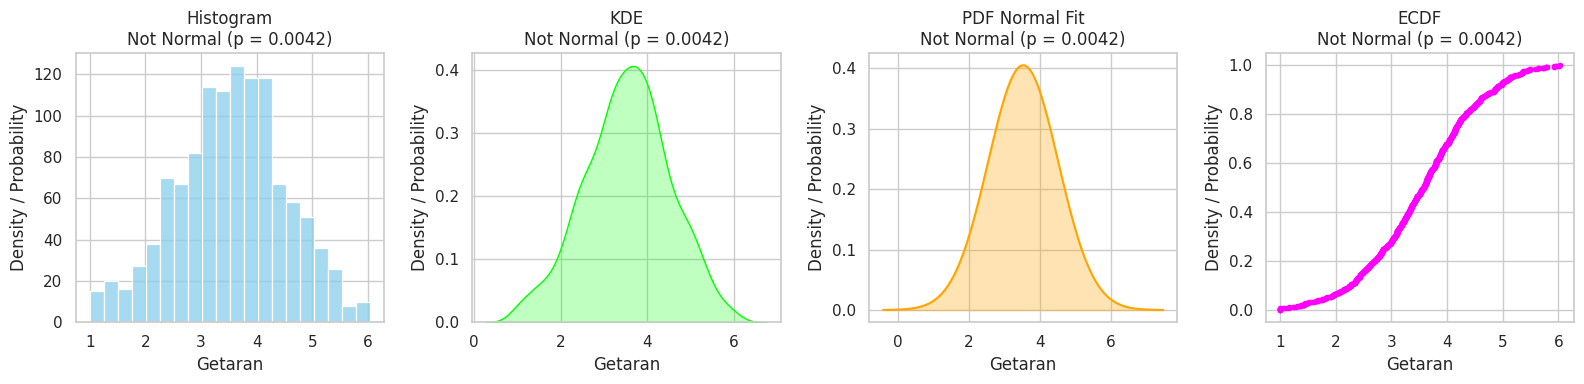

In [33]:
# Contoh Data (misalnya df_mtn_machine)
visual = DistribusiUjiNormalitas(df_cleaned, 'Getaran')
visual.plot_distributions()

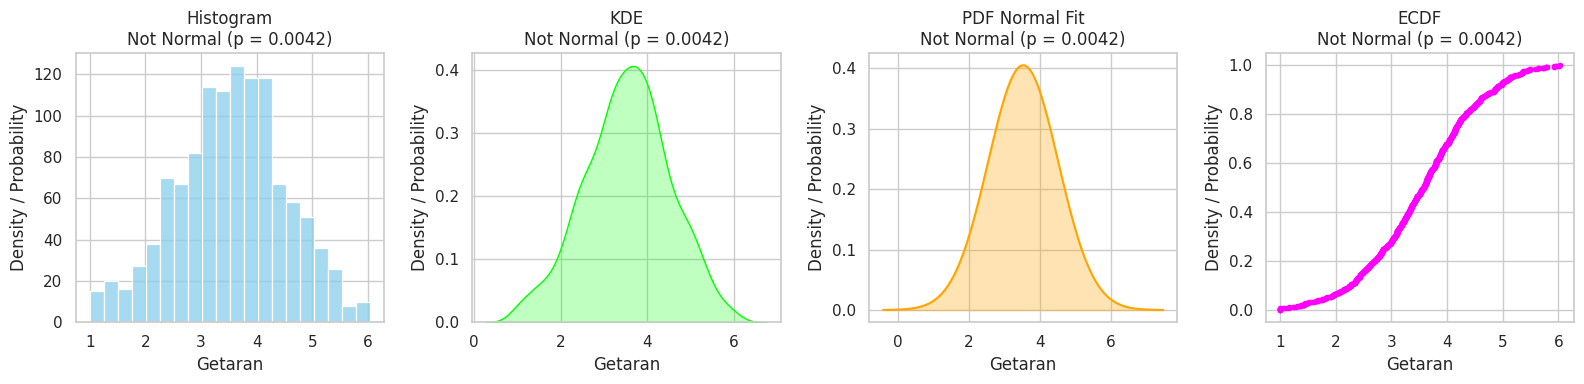

In [34]:
# Contoh Data (misalnya df_mtn_machine)
visual = DistribusiUjiNormalitas(df_cleaned, 'Getaran')
visual.plot_distributions()

<b>Insight</b>
Dari hasil analisis distribusi data dan uji normalitas pada kolom getaran dapat kita simpulkan bahwa getaran tidak memiliki distribusi normal namun meskipun begitu nilai p value nya menunjukan H0 di tolak dan H1 diterima yang bisa kita asumsikan bahwa mungkin saja fitur ini memiliki pengaruh terhadap kerusakan mesin dan bisa kita hightlight untuk bagian ini 

#### D.Uji normalitas dan juga distribusi data untuk jam operasi
---

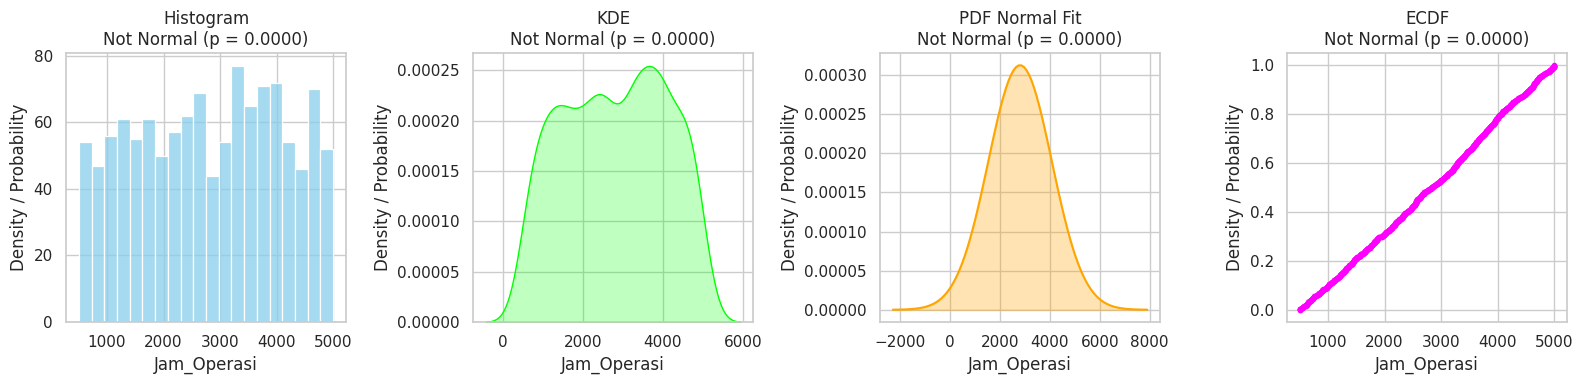

In [35]:
# Contoh Data (misalnya df_mtn_machine)
visual = DistribusiUjiNormalitas(df_cleaned, 'Jam_Operasi')
visual.plot_distributions()

<b>Insight :</b>
Nah untuk jam operasi bisa kita simpulkan bahwa fitur ini tidak memiliki distribusi normal an nilai p value nya sangat ekstrem yaitu bernilai 0 yang menunjukan adanya anomali pada bagian fitur ini dan kita akan mencari tahu kenapa penyebab nya serta dari grafik histogram yang didapat bisa kita ambil kesimpulan bahwa rata-rata operasi produksi ada selalu ada di sekitar 3500 - 4000 jam yang menunjukan ini adalah ambang batas dari proses produksi yang berlangngsung dengan frekuensi kemunculan sekitar 75.

dan pada grafik tersebutb jika dapat diketahui bahwa jam operasi palimng sedikit ada di angka 3000 jam dengan probabilitas nya sekitar 42 % bisa jadi pada jam operasi ini mesion mengalami overheat dan perlu untuk dilakukan pemeriksaan ulang karena meskipun jam operasi ada yang paling rendah lagi yaitu 1000 jam tapi probabilitas nya sekiat 52 kali kemunculan 

dan setelah mesin dipakai sekitar 4000 jam terjadi penurunan angka produksi yang menginikasikan bahwa setelah mesin digunakan untuk produksi tinggi tekniksi dan juga engineer akan memeriksa ulang mesin sebekum dipakai kembali 

#### E.Uji normalitas dan juga distribusi data untuk Arus Listrik
---

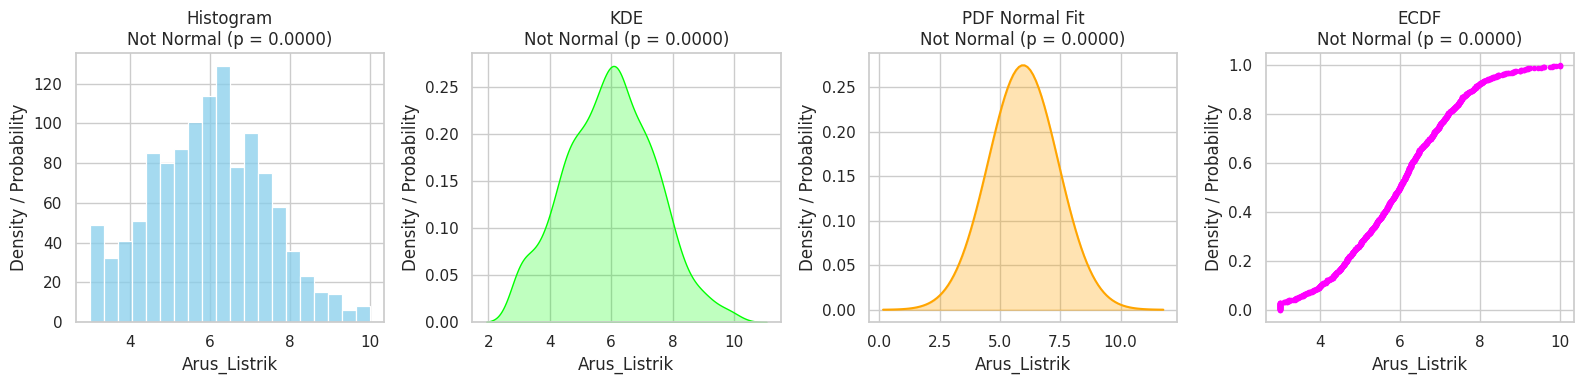

In [36]:
# Contoh Data (misalnya df_mtn_machine)
visual = DistribusiUjiNormalitas(df_cleaned, 'Arus_Listrik')
visual.plot_distributions()

<b>Insight</b>
dari hasil grafik yang didapat bisa kita ambil kesimpulan bahwa pada awal nya terjadi lonjakan arus listrik pada saat produksi sedang berlangsung dengan rata-rata arus listrik yang terpakai sekitar 6 dengan frekuensi kemunculan 122 kali yang menunjukan bahwa ada lonjakan arus listrik yang tinggi dan setelah itu mesin kemungkinan mengalami penurunan peforma seiirng dengan waktu.

#### F.Uji normalitas dan juga distribusi data untuk kolom tekanan oli
---

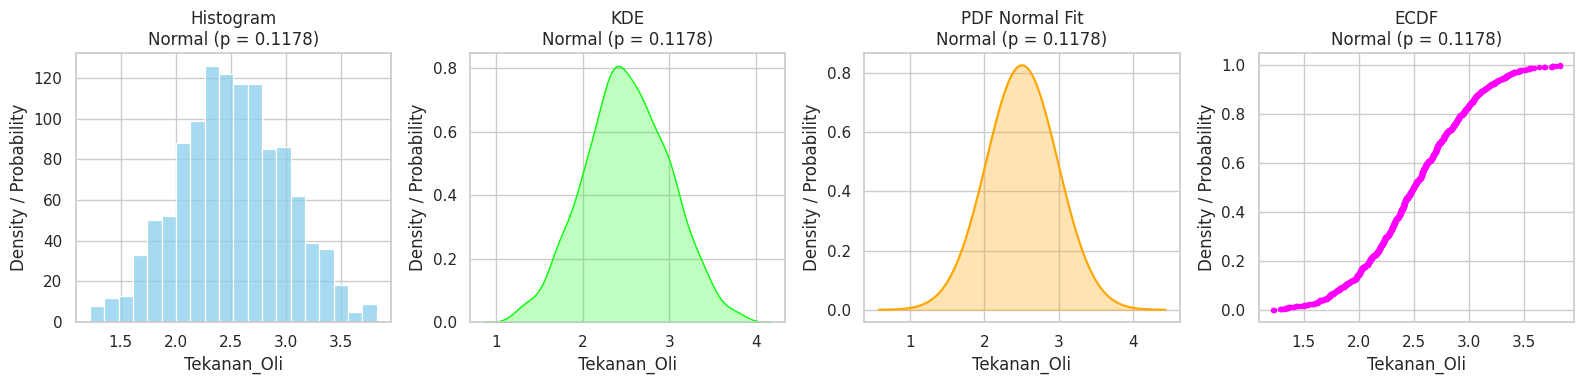

In [37]:
# Contoh Data (misalnya df_mtn_machine)
visual = DistribusiUjiNormalitas(df_cleaned, 'Tekanan_Oli')
visual.plot_distributions()

<b>Insight : </b>
dari hasil visualisasi diatas bisa kita simpulkan bahwa pada saat mesin beropasi pada peforma tinggi ada kerugian energi akibat dari gesekan antar elemen mesin yang mengakibatkan ada nya rugu-rugi energi yang menyebabkan mesin menjadi panas pada komponen yabg berputar sehingga meningkatkan tekanan oli untuk mendinginakn komponen  yang panas puncak nya adalah ada di sekitar 2.0 sampai dengan 2.4 ada kenaikan bertahap pada tekanan oli lalu penurunan setelah nya  

#### G.Uji normalitas dan juga distribusi data untuk umur sisa mesin
---

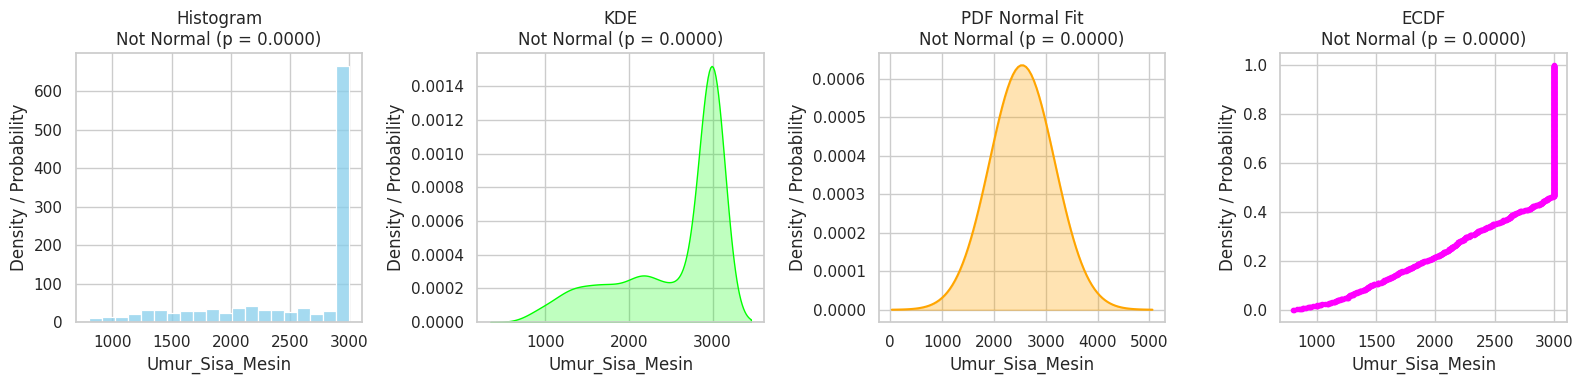

In [38]:
# Contoh Data (misalnya df_mtn_machine)
visual = DistribusiUjiNormalitas(df_cleaned, 'Umur_Sisa_Mesin')
visual.plot_distributions()

<b>Insight :</b>
untuk kolom ini banyak sekali mengalami anomali pada datanya tapi kalo kita lihat secara grafik nyadapat diketahui bahwa ada penurunan signifikan pada umur mesin dan mesin kembali paa peforma terbaik nya setelah ada perbaikan karena paa grafik menunjukan 3000 dengan probabilitas nya sekitar 600 x kemunculan pada visualisasi histogram  

### 2.1.4 Analisis Korelasi data dengan barplot
---
pada bagian ini kita akan mencari tahu korelasi dari setiap fitur pada datasheet yang kita gunakan

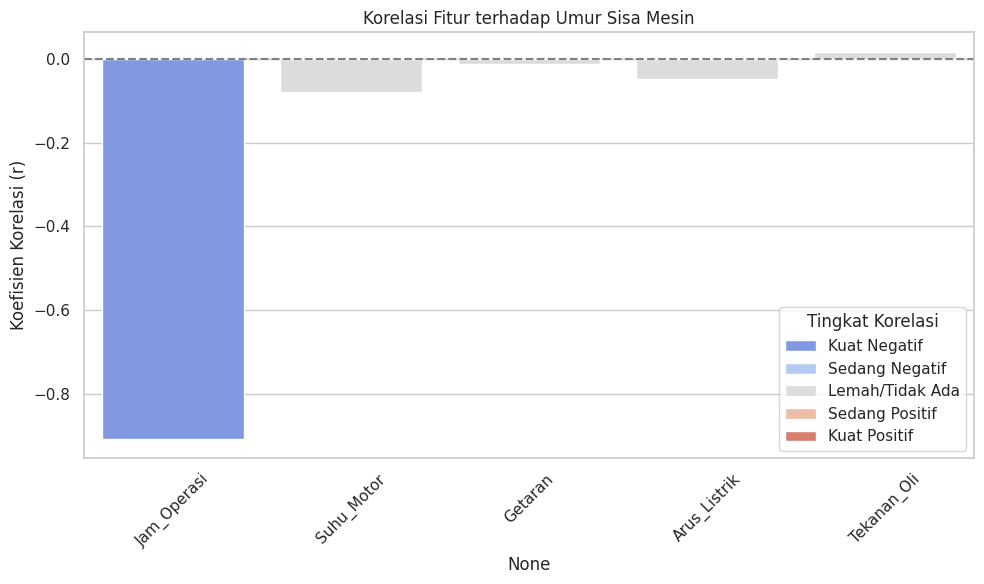

              Korelasi         Kategori
Tekanan_Oli   0.017441  Lemah/Tidak Ada
Getaran      -0.012810  Lemah/Tidak Ada
Arus_Listrik -0.047212  Lemah/Tidak Ada
Suhu_Motor   -0.078401  Lemah/Tidak Ada
Jam_Operasi  -0.908118     Kuat Negatif


In [39]:
# Ambil hanya fitur numerik
features = ['Jam_Operasi', 'Suhu_Motor', 'Getaran', 'Arus_Listrik', 'Tekanan_Oli']
target = 'Umur_Sisa_Mesin'

# Hitung korelasi
correlations = df_cleaned[features + [target]].corr(method='spearman')[target].drop(target)

# Buat DataFrame korelasi dan kategorisasi kekuatan korelasi
correlation_df = pd.DataFrame(correlations)
correlation_df.columns = ['Korelasi']
correlation_df['Kategori'] = pd.cut(correlation_df['Korelasi'],
                                     bins=[-1, -0.7, -0.3, 0.3, 0.7, 1],
                                     labels=['Kuat Negatif', 'Sedang Negatif', 'Lemah/Tidak Ada', 'Sedang Positif', 'Kuat Positif'])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_df.index, y='Korelasi', data=correlation_df, hue='Kategori', palette='coolwarm')
plt.title("Korelasi Fitur terhadap Umur Sisa Mesin")
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel("Koefisien Korelasi (r)")
plt.xticks(rotation=45)
plt.legend(title='Tingkat Korelasi')
plt.tight_layout()
plt.show()

# Tampilkan dataframe korelasi
print(correlation_df.sort_values("Korelasi", ascending=False))

<b>insight : </b>
dari hasil visualisasi diatas tarnyata data kita tidak memiliki korelasi yang kuat satu sama lain yang membuat bagian ini sulit dianalisis dengan menggunakan regresi linear karena lemah nya korelasi antara satu sama lain tapi kita akan menggunakan alternatif lain untuk model yaitu dengan menggunakan polynominal regression dan juga unsuvervised learning 

## 2.2 Statistik deskriptif
---
pada bagian 2.2 kita akan melakukan analisis statistik deskriptif untuk mengetahui insight apa saja yang bisa di dapatkan sehingga bisa dijadikan informasi tambahan yang mungkin aja bisa membantu engineer dan juga juga tekniksi kedepan nya 

### 2.2.1 Mencari hubungan antara suhu motor dengan semua variabel yang ada pada datasheet
---
pada bagian 2.2.1 ini kita akan mulai dengan mencari tahu apakah kenaikan pada suhu motor sebanding dengan jam operasi 

#### A. Analisis Pengaruh Panas 
---
kita akan mulai dari mencari tahu pengaruh panas opada motor / pompa yang digunakan 

In [40]:
# buat dataframe baru dari dataframe yang sudah di process sebelumnya 
df_heat = df_cleaned.copy()
df_heat['Bin_Suhu_Motor'] = pd.cut(df_heat["Suhu_Motor"], bins=5)

# Groupby dan aggregasi untuk melihat tren suhu tinggi
agg_suhu = df_heat.groupby("Bin_Suhu_Motor")[["Jam_Operasi", "Getaran", "Tekanan_Oli"]].agg(["mean", "std", "count"])
agg_suhu = agg_suhu.sort_index(ascending=False)

# Salin hasil agregasi
styled_agg_suhu = agg_suhu.copy()

# Styling fungsi untuk highlight nilai maksimum atau minimum tertentu
def highlight_critical(val, colname, mode="max"):
    if mode == "max":
        return 'color: red; font-weight: bold;' if val == styled_agg_suhu[colname].max() else ''
    elif mode == "min":
        return 'color: red; font-weight: bold;' if val == styled_agg_suhu[colname].min() else ''
    else:
        return ''

# Terapkan styling menggunakan Styler
styled = styled_agg_suhu.style

# Highlight nilai kritis (bisa disesuaikan sesuai kondisi)
styled = styled.applymap(lambda v: highlight_critical(v, ('Getaran', 'mean'), mode='max'), subset=[('Getaran', 'mean')])
styled = styled.applymap(lambda v: highlight_critical(v, ('Tekanan_Oli', 'mean'), mode='min'), subset=[('Tekanan_Oli', 'mean')])
styled = styled.applymap(lambda v: highlight_critical(v, ('Jam_Operasi', 'mean'), mode='max'), subset=[('Jam_Operasi', 'mean')])

# Tampilkan
styled

##### Cari hubungan antara Suhu Motor dengan jam operasi, getaran dan juga tekanan oli 
---
pada bagian ini kit akan melakukan analisis untuk mencari tahu pakah ada hubungan korelasi antara fitur suhu motor dengan jam operasi serta tekanan oli 

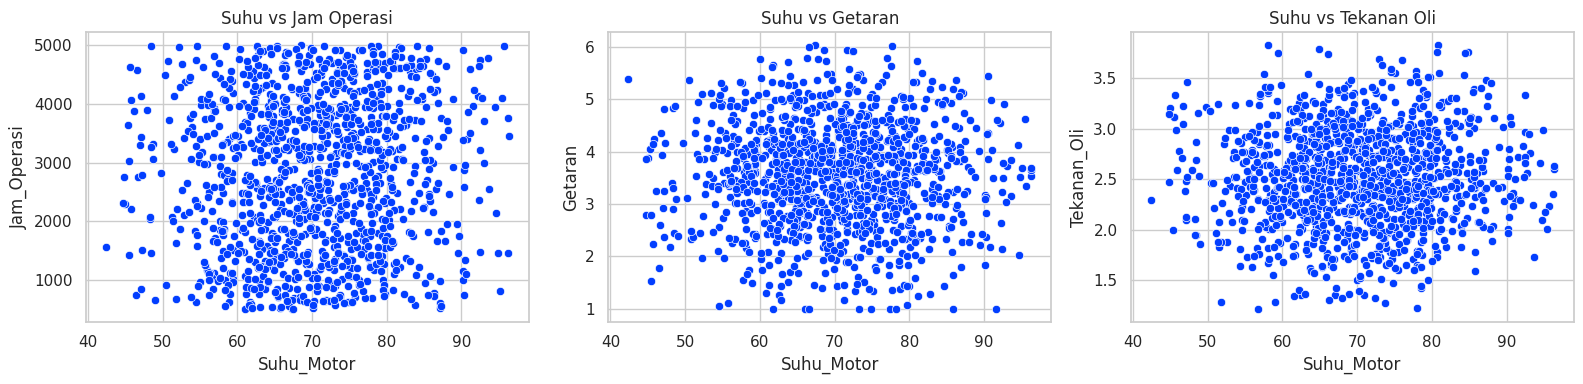


    
berdasarkan hasil visualisasi diatas dapat diketahui bahwa tidak ada keterhubungan antara fitur suhu dengan jam operasi
    
getaran maupun tekanan oli sehingga kondisi tidak relevan dengan kerusakan mesin kirta akan coba eksplorasi lebih dalam
    


In [41]:
# buat canvas visualisasi regplot
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

sns.scatterplot(x = "Suhu_Motor", y = "Jam_Operasi", data = df_heat, ax=axs[0])
sns.scatterplot(x = "Suhu_Motor", y = "Getaran", data = df_heat, ax=axs[1])
sns.scatterplot(x = "Suhu_Motor", y = "Tekanan_Oli", data = df_heat, ax=axs[2])

axs[0].set_title("Suhu vs Jam Operasi")
axs[1].set_title("Suhu vs Getaran")
axs[2].set_title("Suhu vs Tekanan Oli")

plt.tight_layout()
plt.show()

print("""
    \nberdasarkan hasil visualisasi diatas dapat diketahui bahwa tidak ada keterhubungan antara fitur suhu dengan jam operasi
    \ngetaran maupun tekanan oli sehingga kondisi tidak relevan dengan kerusakan mesin kirta akan coba eksplorasi lebih dalam
    """)

##### Buat Label kategorisasi untuk analisis perbaikan pompa berdasarkan suhu, getaran dan juga tekanan oli
---
pada bagian ini kita akan melakukan analisis untuk mengetahui seberapa banyak perbaikan yang harus dilakukan berdasarkan suhu pompa yang sudah diberi label secara manual 

In [42]:
def suhu_label(suhu):
    if suhu < 50:
        return "Normal"
    elif 50 <= suhu <= 70:
        return "Perlu Dicek"
    else:
        return "Ganti Sparepart"

df_heat["Label_Pemeliharaan"] = df_heat["Suhu_Motor"].apply(suhu_label)

# Cek distribusi label
df_heat["Label_Pemeliharaan"].value_counts()

print()

##### Analisis Groupby untuk mengetahui status pemeliharaan berdasarkan jam operasi, getaran dabn juga tekanan oli 
---
pada bagian ini kita akan melakukan analisis untuk mengetahui status pemeliharaan berdasarkan jam operasi, getaran dan juga tekanan oli

In [43]:
grouped_label = df_heat.groupby("Label_Pemeliharaan")[["Jam_Operasi", "Getaran", "Tekanan_Oli", "Umur_Sisa_Mesin"]].agg(["mean", "std", "count"])
grouped_label.round(2)

Jam_Operasi                Getaran             Tekanan_Oli  \
                          mean      std count    mean   std count        mean   
Label_Pemeliharaan                                                              
Ganti Sparepart        2876.73  1280.74   597    3.51  0.99   597        2.51   
Normal                 2782.17  1183.89    30    3.40  0.99    30        2.67   
Perlu Dicek            2719.82  1273.17   550    3.57  0.98   550        2.49   

                               Umur_Sisa_Mesin                
                     std count            mean     std count  
Label_Pemeliharaan                                            
Ganti Sparepart     0.48   597         2499.75  647.96   597  
Normal              0.47    30         2659.13  533.81    30  
Perlu Dicek         0.48   550         2584.33  609.00   550

##### Buat Visualisasi data boxplot untuk mengetahui status pemeliharaan 
---
setelah kita berhasil membuat analisis untuk status pemeliharaan maka selanjutnya adalah melihat hasil visualisasi nya dalam tampilan boxplot

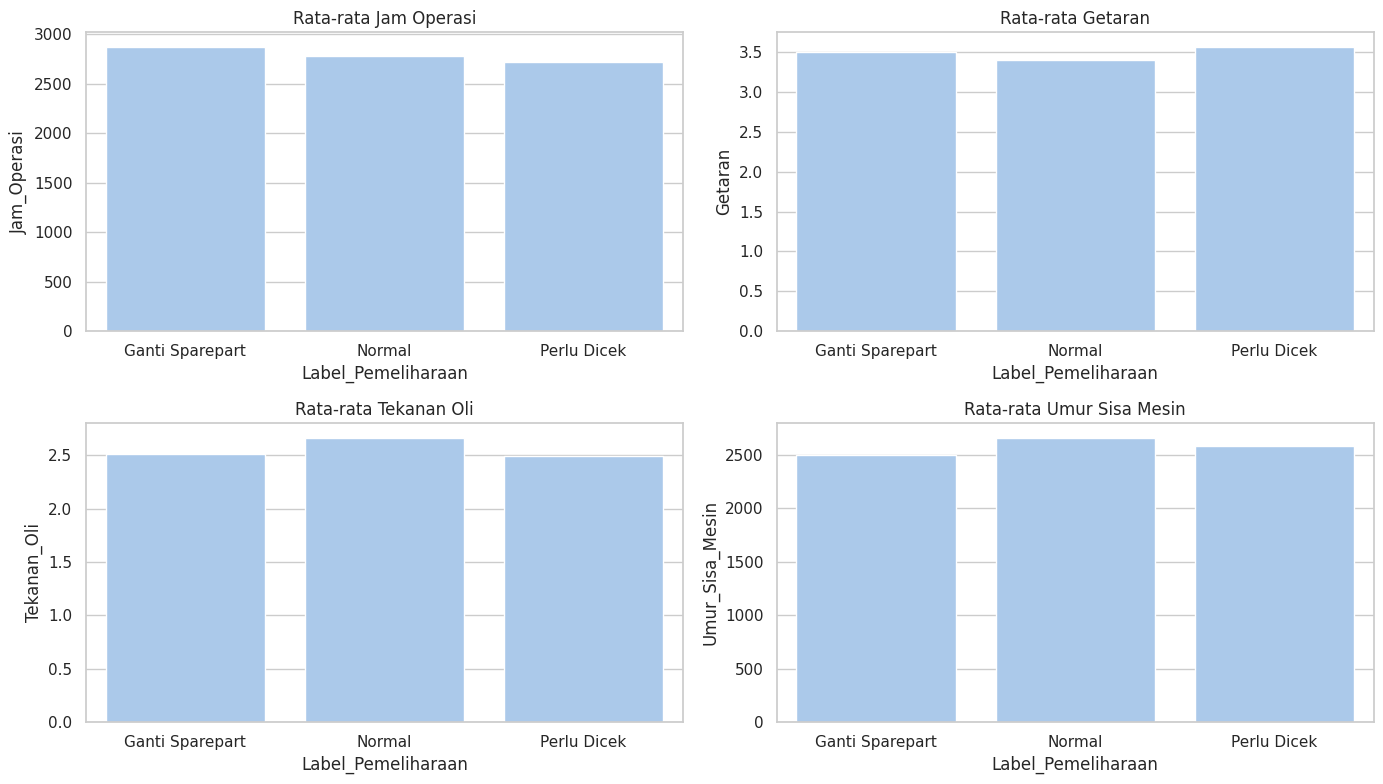

In [44]:
# Set gaya visual
sns.set(style="whitegrid", palette="pastel")

# Buat plot bar rata-rata dari groupby
mean_grouped = df_heat.groupby("Label_Pemeliharaan")[["Jam_Operasi", "Getaran", "Tekanan_Oli", "Umur_Sisa_Mesin"]].mean().reset_index()

# Plot bar
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

sns.barplot(x="Label_Pemeliharaan", y="Jam_Operasi", data=mean_grouped, ax=axs[0,0])
sns.barplot(x="Label_Pemeliharaan", y="Getaran", data=mean_grouped, ax=axs[0,1])
sns.barplot(x="Label_Pemeliharaan", y="Tekanan_Oli", data=mean_grouped, ax=axs[1,0])
sns.barplot(x="Label_Pemeliharaan", y="Umur_Sisa_Mesin", data=mean_grouped, ax=axs[1,1])

axs[0,0].set_title("Rata-rata Jam Operasi")
axs[0,1].set_title("Rata-rata Getaran")
axs[1,0].set_title("Rata-rata Tekanan Oli")
axs[1,1].set_title("Rata-rata Umur Sisa Mesin")

plt.tight_layout()
plt.show()

<b>Insight</b>
dari hasil visualisasi tersebut dapat diketahui bahwa :
1. rata-rata jam operasi mesin yang panjang dapat mengakibatkan beberapa komponen mesin menjadi rusak dan perlu untuk diganti
2. sedangkan rata-rata getaran yang tidak wajar membuat mesin rentan dan harus dilakukan ganti sparepart dan juga perlu adanya pengecekan
3. pada tekanan oli diketahui bahwa bahwa rata-rata mesin pada level normal bisa kita katakan bahwa tekanan oli ini cukup baik
4. sedangkan pada sisa umur mesin pun seperti nya sama engan tekanan oli walaupun untuk pergantian sparepatr nya dan juga penegecekan nya harus dilakukan sesering mungkin 

#### B Analisis persentase bulan operasi produksi terhadap label pemeliharaan 
---
pada tahap ini kita akan mulai dari konversi fitur jam operasi ke bentuk bulan operasi agar engineer dan teknisi bisa mengetahui di bulan apa saja peforma mesin harus di lakukan inspeksi ulang secar berkala.

## 3. Data Preprocessing
---
pada tahap ini kita akan melakukan preprocessing data sebelum dilanjutkan pada tahap pembuatan model machine learning agar model yang didaptkan nati nya bisa sesuai dengan yang diharapkan dan memberikan hasil terbaik melalui insight yang didapat

pada data preprocessing inikita akan menggunakan data df_cleaned sebagai data utama dan akan melakujkan trasformasi jam operasi ke format bulan untuk nantinya dibuat template list pengecekan diakhir nanti  

### 3.1 Transformasi data dengan robust scaler 
---
pada bagian ini kit akan melakukan tranformasi data agar semua  rentang nilai ny berada pada ambang 0 dan juga -1 yang berguna untuk menjaga rentang data agar tidak saling berjauhan satu sama lain

In [45]:
# import library yang dibutuhkan 
from sklearn.preprocessing import RobustScaler # library untuk norrmalisasi data dengan robust scaler

# Pilih kolom fitur numerik yang akan di-scale
features = ['Jam_Operasi', 'Suhu_Motor', 'Getaran', 'Arus_Listrik', 'Tekanan_Oli', 'Umur_Sisa_Mesin']

# Inisialisasi RobustScaler
scaler = RobustScaler()

# Transformasi data
df_scaled = df_cleaned.copy()
df_scaled[features] = scaler.fit_transform(df_scaled[features])

# Cek hasil scaling
print(df_scaled.head())

   Jam_Operasi  Suhu_Motor   Getaran  Tekanan_Oli  Arus_Listrik  \
0    -0.678654    0.344193 -1.709924    -0.409091      0.710145   
1     0.663900    0.825071  0.961832    -1.015152     -1.193237   
2     0.350392    0.048159 -0.694656    -0.863636      0.787440   
3    -0.860304   -1.082861  1.022901    -0.045455     -0.507246   
4     0.965422    0.426346  0.236641    -0.045455      0.149758   

   Umur_Sisa_Mesin  
0         0.000000  
1        -1.665521  
2        -1.071019  
3         0.000000  
4        -2.104238  


### 3.2 Uji Multikornelitas dan juga chi square 
---
setelah dilakukan tahap preprocessing menggunakan transformasi robust tahap selanjutnya adalah dengan melakukan pengecekan apakah ada kondisi multikornelitas ekstrem yang membuat model regresi kita gagal.  

selain untuk menguji multikornelitas dibagian ini juga dilakukan pengujian chi square untuk mengetahui fitur apa saja yang memiliki rangking tertinggi serta potensial untuk digunakan dalam pembuatan model machine learning 

In [46]:
from sklearn.feature_selection import chi2, SelectKBest
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_cleaned.drop(columns='Umur_Sisa_Mesin')
y = df_cleaned['Umur_Sisa_Mesin']

# Chi-Square butuh nilai non-negatif
X_chi2 = X - X.min() + 1e-3

# Chi-Square Feature Selection
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X_chi2, y.abs())  # gunakan nilai absolut untuk target
chi2_scores = pd.Series(chi2_selector.scores_, index=X.columns).sort_values(ascending=False)

# Hitung VIF
X_vif = X.copy()
X_vif['Intercept'] = 1
vif_data = pd.DataFrame()
vif_data['Fitur'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X.columns))]

chi2_scores, vif_data.sort_values(by='VIF', ascending=True)

(Jam_Operasi     685890.897650
 Suhu_Motor        1875.104038
 Arus_Listrik       374.395244
 Getaran            173.098387
 Tekanan_Oli         79.527309
 dtype: float64,
           Fitur       VIF
 4  Arus_Listrik  1.000515
 3   Tekanan_Oli  1.001460
 2       Getaran  1.002276
 1    Suhu_Motor  1.006392
 0   Jam_Operasi  1.007186)

<b>Insight : </b>

Apa itu VIF?
1. VIF (Variance Inflation Factor) mengukur seberapa besar sebuah variabel independen dipengaruhi oleh variabel independen lainnya.
2. VIF tinggi artinya ada multikolinearitas (ketergantungan antar fitur), yang dapat merusak model regresi.

Semua fitur (Arus_Listrik, Tekanan_Oli, Getaran, Suhu_Motor, Jam_Operasi) memiliki VIF sangat dekat dengan 1.
Artinya: tidak ada fitur yang saling bergantung secara linear. Ini kondisi ideal untuk membangun model regresi (Linear, Ridge, Lasso, Polynomial, dsb)

### 3.3 Membuat visualisasi data untuk mencari hubungan antar fitur dengan grafik regplot
---
pada bagian ini kita akan mencoba untuk mencari hubungan antara setiap fitur yang ingin digunakan dengan visualisasi regplot 

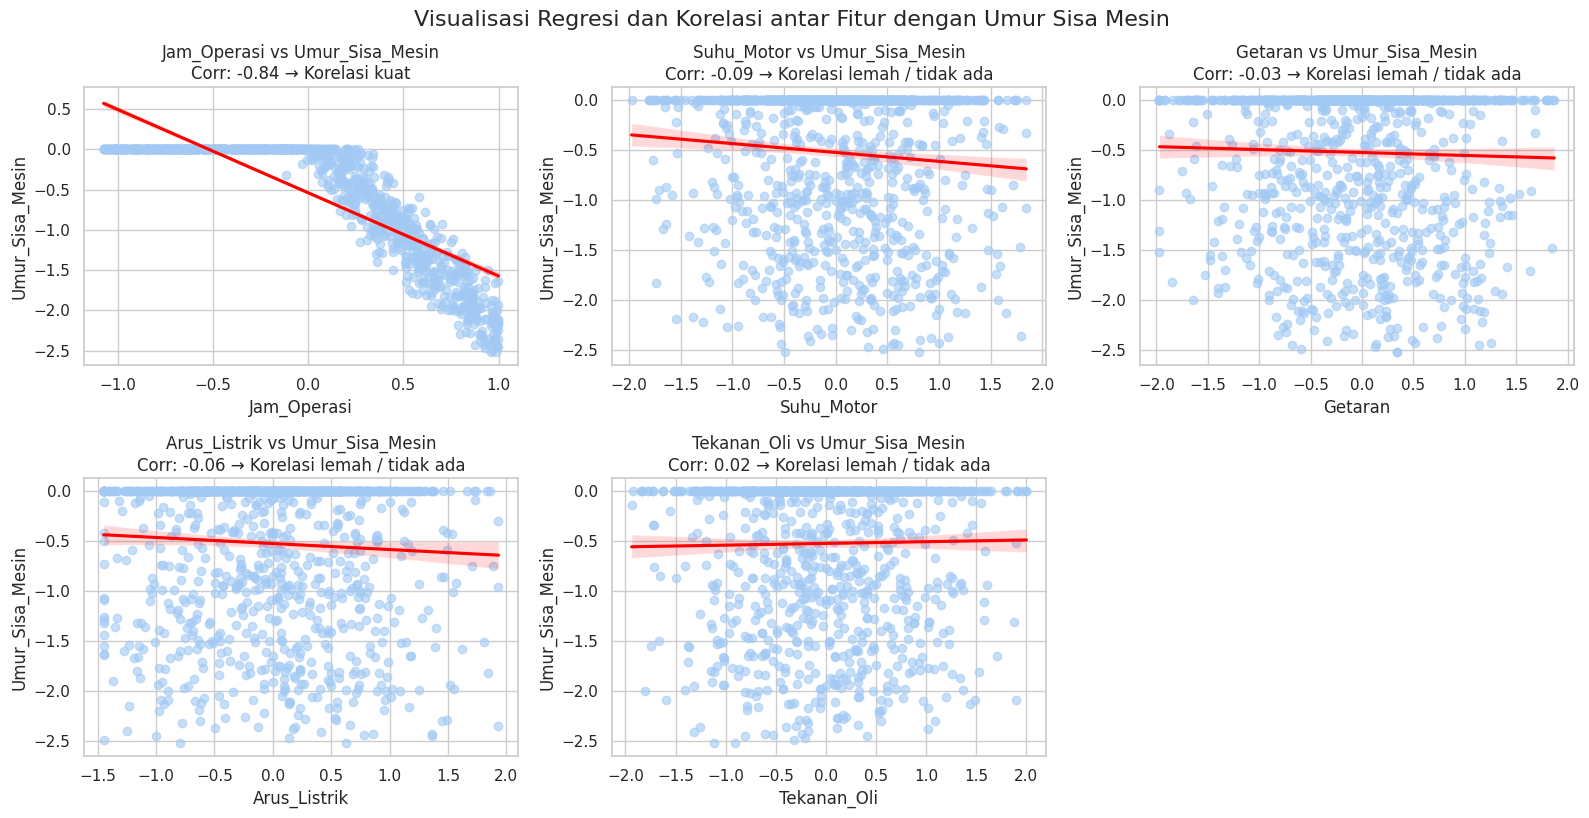

In [47]:
# Pastikan target ada
target = 'Umur_Sisa_Mesin'
fitur = ['Jam_Operasi', 'Suhu_Motor', 'Getaran', 'Arus_Listrik', 'Tekanan_Oli']

# Buat canvas untuk visualisasi regplot
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
axs = axs.flatten()

# Visualisasi dan korelasi
for i, feature in enumerate(fitur):
    sns.regplot(x=feature, y=target, data=df_scaled, ax=axs[i],
                scatter_kws={'alpha':0.6}, line_kws={"color":"red"})
    
    # Hitung korelasi
    corr = df_scaled[feature].corr(df_scaled[target])
    
    # Tambahkan label kekuatan korelasi
    if abs(corr) >= 0.7:
        label = "Korelasi kuat"
    elif abs(corr) >= 0.4:
        label = "Korelasi sedang"
    else:
        label = "Korelasi lemah / tidak ada"
    
    axs[i].set_title(f"{feature} vs {target}\nCorr: {corr:.2f} → {label}")

# Hapus subplot kosong jika fitur < 6
if len(fitur) < len(axs):
    for j in range(len(fitur), len(axs)):
        fig.delaxes(axs[j])

plt.tight_layout()
plt.suptitle("Visualisasi Regresi dan Korelasi antar Fitur dengan Umur Sisa Mesin", fontsize=16, y=1.02)
plt.show()

<b>Insight</b>
hasil visualisasi tersebut menunujukan bahwa ada korelasi abtara umur mesin dan jam operasi yang dimana ada penurunan pada umur mesin akan berpengaruh pada jam operasi pada saat produksi berlangsung. 

namun sayang nya ada data yang bernilai outlier pada fitur umur sisa mesin sehingga kita akan mencoba beberapa modelm lain yaitu elastic net

## 4.Build Model Machine Learning
---
pada bagian ini kita akan membuat model machine learning menggunakan fitur yang memiliki nilai chi squared yang tinggi sebagai potensial fitur yang bisa digunakan untuk membuat model berbasis estimasi baik itu menggunakan ridge, polynominal, lasso ataupun elastic net

pada bagian ini juga akan melewati beberapa tahap yaitu : 
1. bagi datasheet menjadi bagian untuk traning, testing dan juga valiation
2. setting hyperparameter yang digunakan pada model
3. latih model dengan data yang sudah di bagi dan hyperparameter yang sudah di setting
4. melakukan validasi model dengan kfold ataupun grid search cv untuk melihat perfotma model
5. lakukan pengujian model terhadap data test dan sample data baru
6. lakukan pengukuran model dengan RMSE, MSE, MAE dan R2 Score
7. jika model baik maka load ke joblib atau pickle untuk di implementasikan ke streamlit ataupun flask

### 4.1 Bagi datasheet yang sudah di preprocessing ke bentuk data test dan juga train 
---
pada tahap ini kita akan melakukan pembagian datahseet yang kita gunakan untuk mulai membuat model machine learning  

In [67]:
# bagi datahsheet yang sudah di processing ke dalam bentuk data latih
from sklearn.model_selection import (
    train_test_split, KFold, GridSearchCV
) # Library untuk membuat data latih, testing dan validasi model 

X = df_scaled[['Jam_Operasi', 'Suhu_Motor', 'Getaran', 'Arus_Listrik', 'Tekanan_Oli']]
y = df_scaled['Umur_Sisa_Mesin']

# buat variabel untuk menyimpan data latih, testing dan validation 
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# melihat jumlah data yang dibagi kedalam kategori traning dan testing  
data_splits = {
    "X training": X_train, "X testing": X_test,
    "y training": y_train, "y testing": y_test
}

# Gunakan loop untuk menampilkan bentuk data
for name, data in data_splits.items():
    print(f"Jumlah data {name} yang digunakan berjumlah : {data.shape}")

print("\nberdasarkan pembagian data tersbeut dapat diketahui bahwa untuk data train nya berjumlah 915 dan data latih nya berjumlah 259 data")

Jumlah data X training yang digunakan berjumlah : (941, 5)
Jumlah data X testing yang digunakan berjumlah : (941,)
Jumlah data y training yang digunakan berjumlah : (236, 5)
Jumlah data y testing yang digunakan berjumlah : (236,)

berdasarkan pembagian data tersbeut dapat diketahui bahwa untuk data train nya berjumlah 915 dan data latih nya berjumlah 259 data


In [70]:
# Misal df_final adalah dataset bersih yang sudah melalui EDA, filtering outlier, scaling, dll
X = df_scaled[['Jam_Operasi', 'Suhu_Motor', 'Getaran', 'Arus_Listrik', 'Tekanan_Oli']]
y = df_scaled['Umur_Sisa_Mesin']

# Pastikan ukuran X dan y sama
print(X.shape, y.shape)

# Lakukan split ulang
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Cek lagi setelah split
print(X_train.shape, y_train.shape)


(1177, 5) (1177,)
(941, 5) (941,)


### 4.2. Setting Hyperparameter model dan juga validasi model terbaik untuk studi kasus ini
---
pada tahap ini kita akan melakukan analisis untuk setting hyperparameter dan juga validasi model terbaik apakah dengan data yang kita gunakan lebih cocok untuk model dengan mendapatkan model terbaik diharapkan nantinya bisa mendpat model yang tahan terhadap over fitting dan juga under fitting sehingga bisa kita deploy untuk di lingkungan produksi 

In [71]:
# import library yang dibutuhkan 
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Setting KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Model pipelines and param grids
models = {
    'Lasso': {
        'pipeline': Pipeline([
            ('scaler', RobustScaler()),
            ('model', Lasso(max_iter=10000))
        ]),
        'param_grid': {
            'model__alpha': [0.001, 0.01, 0.1, 1, 10]
        }
    },
    'Ridge': {
        'pipeline': Pipeline([
            ('scaler', RobustScaler()),
            ('model', Ridge(max_iter=10000))
        ]),
        'param_grid': {
            'model__alpha': [0.001, 0.01, 0.1, 1, 10]
        }
    },
    'ElasticNet': {
        'pipeline': Pipeline([
            ('scaler', RobustScaler()),
            ('model', ElasticNet(max_iter=10000))
        ]),
        'param_grid': {
            'model__alpha': [0.001, 0.01, 0.1, 1],
            'model__l1_ratio': [0.1, 0.5, 0.9]
        }
    },
    'Polynomial': {
        'pipeline': Pipeline([
            ('scaler', RobustScaler()),
            ('poly', PolynomialFeatures()),
            ('model', LinearRegression())
        ]),
        'param_grid': {
            'poly__degree': [2, 3]
        }
    }
}

# Evaluasi model
best_models = {}

for name, config in models.items():
    print(f"\nEvaluasi Model: {name}")
    grid = GridSearchCV(estimator=config['pipeline'],
                        param_grid=config['param_grid'],
                        cv=kfold,
                        scoring='r2',
                        n_jobs=-1)
    grid.fit(X_train, y_train)
    
    # Simpan model terbaik
    best_models[name] = grid.best_estimator_
    
    # Evaluasi di test set
    y_pred = grid.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"Parameter terbaik : {grid.best_params_}")
    print(f"Skor R2 pada test data: {r2:.4f}")
    print(f"MSE pada test data : {mse:.4f}")


Evaluasi Model: Lasso
Parameter terbaik : {'model__alpha': 0.001}
Skor R2 pada test data: 0.7019
MSE pada test data : 0.1565

Evaluasi Model: Ridge
Parameter terbaik : {'model__alpha': 1}
Skor R2 pada test data: 0.7020
MSE pada test data : 0.1565

Evaluasi Model: ElasticNet
Parameter terbaik : {'model__alpha': 0.01, 'model__l1_ratio': 0.5}
Skor R2 pada test data: 0.7005
MSE pada test data : 0.1573

Evaluasi Model: Polynomial
Parameter terbaik : {'poly__degree': 2}
Skor R2 pada test data: 0.9398
MSE pada test data : 0.0316


<h3>Evaluasi Model Regresi - Tuning Hyperparameter</h3>

<h3>1. Model Linear (Lasso, Ridge, ElasticNet)</h3>

| Model         | Alpha   | L1 Ratio | R² Score | MSE     | Catatan                                 |
|---------------|---------|----------|----------|---------|------------------------------------------|
| **Lasso**     | 0.001   | -        | 0.7019   | 0.1565  | Cukup baik, tetapi regularisasi agak lemah |
| **Ridge**     | 1       | -        | 0.7020   | 0.1565  | Hasil sedikit lebih baik dari Lasso        |
| **ElasticNet**| 0.01    | 0.5      | 0.7005   | 0.1573  | Gabungan L1 & L2, performa mirip Lasso     |

<p>Ketiganya menunjukkan performa yang <b>mirip</b>, dengan <b>R²</b> sekitar <b>0.70</b>, artinya model bisa menjelaskan sekitar <b>70% variasi target (Umur Sisa Mesin)</b>.</p>

---

<h3>2. Model Polynomial Regression (derajat 2)</h3>

| Model            | Degree | R² Score | MSE     | Catatan                                       |
|------------------|--------|----------|---------|-----------------------------------------------|
| **Polynomial**   | 2      | 0.9398   | 0.0316  | ✅ Performa jauh lebih baik, cocok untuk hubungan non-linear |

<p>Dengan <b>R</b>² sebesar <b>0.94</b>, model ini sangat baik dalam menjelaskan variasi target. Artinya, hubungan antar fitur dan target
<b>kemungkinan besar bersifat non-linear</b></p>.

---

<h3>Simpulan</h3>

- **Model terbaik saat ini adalah Polynomial Regression (degree = 2)**.
- Jika menginginkan model linear yang sederhana namun stabil, gunakan **Ridge Regression**.
- **Lasso & ElasticNet** berguna saat ingin seleksi fitur atau regularisasi kuat.
- Model Polynomial cocok digunakan untuk kasus **mesin industri** di mana hubungan antar variabel seringkali tidak linear.

---

<Tahapan Selanjutnya (Opsional)
- Visualisasi: residual vs y_test, prediksi vs aktual
- Export model terbaik
- Skoring prediktif umur sisa mesin berbasis input kondisi aktual
